In [45]:
import numpy as np
import pandas as pd
from glob import glob
import os
from pathlib import Path

# Splitting Your Rows for Storage and Bringing Them Back Together For Analysis Using Pandas


| Function | Description | Example |
| :-- | :-- | :-- |
| `os.makedirs(path, exist_ok=True)` | Make a new directory on the filesystem | `os.makedirs('data/raw', exist_ok=True)` |
| `pathlib.Path(path).mkdir(parents=True, exist_ok=True` | Make a new directory on the filesystem | |
| `for value in values:` | Begin a For-Loop block that repeats a task for each element in a collection | `for num in [10, 5, 20]: print(num)` |
| `np.array_split(df, n)` | Split data into N equalish-size sub-datasets | `for rows in np.array_split(df, 5):` |
| `df.groupby(col)` | Split data into sub-datasets, each with the same value in col | `for treatment, rows in df.groupby('treatment'):` |
| `df.iterrows()` |  Split data by row, returning the index and the row | `for idx, row in df.iterrows():` |
| `enumerate(data)` | Return an iterator with the index and value of each element in a collection | `for idx, el in enumerate(data):` |


In [46]:
url = "https://raw.githubusercontent.com/nickdelgrosso/CodeTeachingMaterials/main/datasets/online_datascience_courses.csv"
df = pd.read_csv(url, index_col=0)
df.head()

,title,author,rating,votes_count,students_count,level,duration,platform,free
0,Машинное обучение и анализ данных,Moscow Institute of Physics and Technology,4.7,6382.0,100000.0,Intermediate,224.0,Coursera,False
1,Introducción a la Especialización en Ciencia d...,IBM,4.6,116.0,3400.0,Beginner,48.0,Coursera,False
2,Getting Started with SAS Programming,SAS,4.8,2083.0,67000.0,Beginner,22.0,Coursera,False
3,Introduction to Designing Data Lakes on AWS,Amazon Web Services,4.7,65.0,6100.0,Intermediate,14.0,Coursera,False
4,Estatística não-paramétrica para a tomada de d...,Universidade de São Paulo,4.4,109.0,9300.0,Intermediate,13.0,Coursera,False


**Exercises**

In `../data/processed/platforms`, make one csv file per platform with that platform's courses.

In [48]:
fold = Path('../data/processed/platforms')
fold.mkdir(parents=True, exist_ok=True)
for name, group in df.groupby('platform'):
    group.drop(labels=['platform'], axis=1).to_csv(fold.joinpath(f"{name.lower()}.csv"))

In `../data/processed/levels`, make one csv file per level with that levels's courses.

In [44]:
fold = Path('../data/processed/levels')
if fold.exists():
    for f in fold.glob('*.csv'):
        f.unlink()
fold.mkdir(parents=True, exist_ok=True)
for name, group in df.groupby('level', dropna=False):
    group.to_csv(fold.joinpath(f"{name.lower()}.csv"))

NotImplementedError: Iteration of DataFrameGroupBy objects requires computing the groups which may be slow. You probably want to use 'apply' to execute a function for all the columns. To access individual groups, use 'get_group'. To list all the group names, use 'df[<group column>].unique().compute()'.

In `../data/processed/ratings`, make one csv file per rating with that rating's courses (note: not all courses have a rating; be sure to put the non-rated ocurses into their own file!).

In [5]:
fold = Path('../data/processed/ratings')
fold.mkdir(parents=True, exist_ok=True)
for rating, group in df.groupby('rating', dropna=False):
    # n = name.replace(' ', '').replace('|', '_').replace('/', '_')
    group.to_csv(fold.joinpath(f"{rating}.csv"))

In `../data/processed/authors`, make one csv file per author with that author's courses. (Note: not all the titles are valid filenames; be sure to replace invalid characters with `str.replace(old, new)`

In [6]:
fold = Path('../data/processed/authors')
fold.mkdir(parents=True, exist_ok=True)
for name, group in df.groupby('author'):
    n = name.replace(' ', '').replace('|', '_').replace('/', '_')
    group.to_csv(fold.joinpath(f"{n.lower()}.csv"))

Split the data into equal thirds, saving each third of the rows into its own numbered file in the `../data/processed/thirds` folder:

In [7]:
fold = Path('../data/processed/thirds')
fold.mkdir(parents=True, exist_ok=True)
for idx, rows in enumerate(np.array_split(df, 3)):
    group.to_csv(fold.joinpath(f"{idx}.csv"))

Split the data into equal fifths, saving each fifth of the rows into its own numbered file in the `../data/processed/fifths` folder:

In [8]:
fold = Path('../data/processed/fifths')
fold.mkdir(parents=True, exist_ok=True)
for idx, rows in enumerate(np.array_split(df, 5)):
    group.to_csv(fold.joinpath(f"{idx}.csv"))

## Using For-Loops to Generate Result Figures for Subgroups

| Function | Description | Example | 
| :-- | :-- | :-- |
| `import matplotlib.pyplot as plt` | Import matplotlib |  |
| `fig = plt.figure()` | Make a new matplotlib figure |  |
| `fig.savefig(filename)`  | Save the figure to a file |  |
| `fig = plt.gcf()` | Get the current figure |  |
| `plt.savefig(filename)` | Save the current figure to a file |  |
| `plt.close();`  | Don't show the plot |  |

In [9]:
import matplotlib.pyplot as plt

Save a histogram of all the reviews to `'../results/rating_hists/all_reviews.png'`:

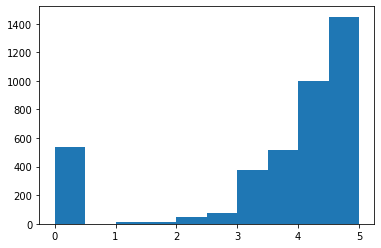

In [10]:
fold = Path('../results/rating_hists')
fold.mkdir(exist_ok=True, parents=True)
plt.hist(df.rating);
plt.savefig(fold / 'all.png');

For each platform, save  a histogram of the reviews to `'../results/rating_hists/{platform}.png'` (note: some platforms don't have a rating system; don't include those platforms):

In [11]:
fold = Path('../results/rating_hists')
fold.mkdir(exist_ok=True, parents=True)
for platform, rows in df.groupby('platform'):
    rows = rows[rows.rating.notna()]
    plt.figure()
    plt.hist(rows.rating);
    plt.savefig(fold / f'{platform}.png');
    plt.close();

Example: make a box plot showing the ratings for free vs nonfree courses:

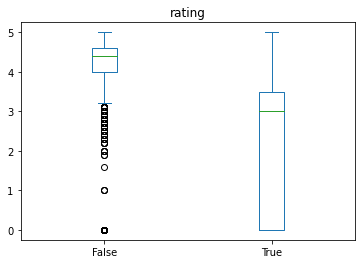

In [12]:
df[['rating', 'free']].plot.box(by='free');

For each level, make a box plot showing the ratings for free vs nonfree courses, putting the plots in `../results/rating_levels_box/{level}.png`:

In [13]:
fold = Path('../results/rating_levels_box')
fold.mkdir(parents=True, exist_ok=True)
for level, rows in df.groupby('level'):
    plt.figure();
    rows[['rating', 'free']].plot.box(by='free');
    plt.savefig(fold / f'{level}.png');
    plt.close();

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## Concatenating Multiple Same-Structured Files into One DataFrame for Analysis

## Concatenation / Appends

The `pd.concat()` fucntion and `DataFrame.append()` method takes DataFrames with identical columns and makes a DataFrame that is **taller** than either of them by stacking them on top of each other.

For example, it can turn this `df1` DataFrame:

| Day | Weather |
| :-: | :---:   |
| Monday | Sunny   |
| Tuesday | Rainy |

and this `df2` DataFrame:

| Day | Weather |
| :-: | :---:   |
| Wednesday | Sunny   |
| Thursday | Rainy |

into this:

| Day | Weather |
| :-: | :---:   |
| Monday | Sunny   |
| Tuesday | Rainy |
| Wednesday | Sunny   |
| Thursday | Rainy |


with one line of code:

```python
pd.concat([df1, df2])
```

**Note:** If you'd like pandas to ignore the index of the dataframes when appending them, the following option is helpful:

```python
pd.concat([df1, df2], ignore_index=True)
```

**Note:** With the `pd.concat()` function, you can concatenate as many dataframes in one step as you want!

#### Exercise

Let's practice concatenating DataFrames with the `pd.concat` function:

In [ ]:
df1 = pd.DataFrame({'Name': ['Jackson', 'Josh', 'Jenny'], 'Age': [16, 19, 17]})
df1

,Name,Age
0,Jackson,16
1,Josh,19
2,Jenny,17


In [ ]:
df2 = pd.DataFrame({'Name': ['Jess', 'Jon', 'Joe'], 'Age': [21, 16, 23]}, index=[3, 4, 5])
df2

,Name,Age
3,Jess,21
4,Jon,16
5,Joe,23


In [ ]:
df3 = pd.DataFrame({'Name': ['Jill', 'Josephine', 'Jack'], 'Age': [5, 10, 61]})
df3

,Name,Age
0,Jill,5
1,Josephine,10
2,Jack,61


Concatenate df1 and df2 together!

Concatenate df2 and df3 together!

Concatenate all three dataframes in a single line

The index in these datasets is unlabelled, indicating that they potentially don't contain useful data.  Concatenate them all together so that the index of the final dataframe is simply 0-8.

| Function | Description | Example |
| :-- | :-- | :-- |
| `glob.glob(pattern)` | Get a list of all files that match a given pattern | `glob('data/**/*.csv/')` |
| `pd.read_csv(fname)` | Return a DataFrmae from a CSV file, given the filename | `pd.read_csv('data/raw/countries_2001.csv')` |
| `pd.concat(dfs)` | Append together same-columned DataFrames along the rows | `pd.concat([df1, df2], ignore_index=True)` |
| `dask.dataframe.read_csv(glob_pattern).compute()` | Read all files that match a pattern | `dd.read_csv('data/*.csv').compute()'` |

**Exercises**

Example: Get a list of all the csv files in `../data/processed/levels`:

In [29]:
from glob import glob
glob('../data/processed/levels/*.csv')

['../data/processed/levels/mixed.csv',
 '../data/processed/levels/intermediate.csv',
 '../data/processed/levels/beginner.csv',
 '../data/processed/levels/advanced.csv']

Get a list of all the csv files in `../data/processed/platforms`:

In [16]:
glob('../data/processed/platforms/*.csv')

['../data/processed/platforms/pluralsight.csv',
 '../data/processed/platforms/stepik.csv',
 '../data/processed/platforms/futurelearn.csv',
 '../data/processed/platforms/coursera.csv',
 '../data/processed/platforms/edx.csv',
 '../data/processed/platforms/udemy.csv',
 '../data/processed/platforms/alison.csv',
 '../data/processed/platforms/skillshare.csv']

Get a list of all the csv files that have a rating between 4.0 and 4.9 in `../data/processed/ratings`:

In [17]:
glob('../data/processed/ratings/4*.csv')

['../data/processed/ratings/4.3.csv',
 '../data/processed/ratings/4.8.csv',
 '../data/processed/ratings/4.0.csv',
 '../data/processed/ratings/4.4.csv',
 '../data/processed/ratings/4.7.csv',
 '../data/processed/ratings/4.5.csv',
 '../data/processed/ratings/4.9.csv',
 '../data/processed/ratings/4.2.csv',
 '../data/processed/ratings/4.6.csv',
 '../data/processed/ratings/4.1.csv']

Read in all the files in `../data/processed/thirds`, concatenating them into a single dataframe:

In [18]:
dfs = []
for fname in glob('../data/processed/thirds/*.csv'):
    dfs.append(pd.read_csv(fname, index_col=0))
df = pd.concat(dfs, ignore_index=True)
df.head()

,title,author,rating,votes_count,students_count,level,duration,platform,free
0,데이터 리터러시 - 데이터 읽고 쓰기의 기술,마소캠퍼스 머니매그넷,4.8,10.0,11.0,Mixed,6.0,Udemy,False
1,데이터 리터러시 - 데이터 읽고 쓰기의 기술,마소캠퍼스 머니매그넷,4.8,10.0,11.0,Mixed,6.0,Udemy,False
2,데이터 리터러시 - 데이터 읽고 쓰기의 기술,마소캠퍼스 머니매그넷,4.8,10.0,11.0,Mixed,6.0,Udemy,False


Read in all the files in `../data/processed/authors`, concatenating them into a single dataframe:

In [19]:
dfs = []
for fname in glob('../data/processed/authors/*.csv'):
    dfs.append(pd.read_csv(fname, index_col=0))
df = pd.concat(dfs, ignore_index=True)
df.head()

CPU times: user 3.42 s, sys: 89.1 ms, total: 3.51 s
Wall time: 3.46 s


,title,author,rating,votes_count,students_count,level,duration,platform,free
0,왕초보 데이터 분석 with R,Evan Jung,5.0,7.0,10.0,Mixed,10.0,Udemy,False
1,AIoT物联网MQTT++Emqx整合,Array老师 高薪启蒙,4.0,1.0,8.0,Mixed,2.5,Udemy,False
2,ディープラーニング：SONYニューラルネットワークコンソール（NNC)による深層学習入門,亀田 健司,3.8,143.0,791.0,Beginner,10.0,Udemy,False
3,Python : Pandas & Altair Data Science & Visual...,"Ashwin Pajankar • 75,000+ Students Worldwide",3.9,23.0,1238.0,Intermediate,14.5,Udemy,False
4,Python Data Processing with Pandas and Plotly,"Ashwin Pajankar • 75,000+ Students Worldwide",4.0,8.0,152.0,Intermediate,13.0,Udemy,False


Make a dataframe from the files in `../data/processed/authors`, keeping only the beginner-level, non-free courses.

In [20]:
dfs = []
for fname in glob('../data/processed/authors/*.csv'):
    df = pd.read_csv(fname, index_col=0)
    df = df[(df.level == 'Beginner') & (df.free == False)]
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df.head()

CPU times: user 4.93 s, sys: 56.2 ms, total: 4.98 s
Wall time: 4.98 s


,title,author,rating,votes_count,students_count,level,duration,platform,free
0,ディープラーニング：SONYニューラルネットワークコンソール（NNC)による深層学習入門,亀田 健司,3.8,143.0,791.0,Beginner,10.0,Udemy,False
1,Python and Pandas Data Science and Visualization,"Ashwin Pajankar • 75,000+ Students Worldwide",4.0,2.0,30.0,Beginner,18.0,Udemy,False
2,Alteryx Designer ハンズオントレーニング（基礎編）,"Classmethod, Inc. Training",4.4,138.0,396.0,Beginner,1.0,Udemy,False
3,Big Data: el impacto de los datos masivos en l...,Universitat Autònoma de Barcelona,4.7,1939.0,31000.0,Beginner,NaN,Coursera,False
4,Big Data – Introducción al uso práctico de dat...,Universitat Autònoma de Barcelona,4.6,2469.0,42000.0,Beginner,72.0,Coursera,False


Using `%%time` at the top of the cell, compare the amount of time that is taken up by the code in the exercise where all the authors' courses were kept to the one where only the nonfree, beginner courses were kept.  Which do you expect to take more time?  Which actually takes more time?

## Concatenating DataFrames across Files with Dask DataFrame

The Dask DataFrame subpackage makes it possible to work on multiple files at once.  This is especially useful for performance on large datasets, but it also makes managing multiple files in general simple. Just use it like you would Pandas commands, and when you want Dask to make the DataFrame, run the `compute()` method:

To Load and Concatenate many CSV files:

```python
import dask.dataframe as dd
df = dd.read_csv("data/*.csv").compute()
```

Oftentimes, the filename contains metadata data we'd like to include in the analysis.  Dask can add the filename as its own column in the dataframe, for followup text processing:

```python
df = dd.read_csv("data/*.csv", include_path_column=True).compute()
```

| Function | Description | Example |
| :-- | :-- | :-- |
| `%pip install dask[dataframe]`  | Install dask and its extra dataframe dependencies |  | 
| `import dask.dataframe as dd` | Import dask dataframe | |
| `dd.read_csv(glob_pattern).compute()` | Read all files that match a pattern | `dd.read_csv('data/*.csv').compute()'` |

**Exercises**:

Using dask dataframe, read in all the authors csvs as a single dataframe:

In [22]:
import dask.dataframe as dd
dd.read_csv('../data/processed/authors/*.csv').compute()

,Unnamed: 0,title,author,rating,votes_count,students_count,level,duration,platform,free
0,890,Data Science - Data Mining Unsupervised Learni...,360DigiTMG Elearning,4.2,10.0,1308.0,Mixed,3.5,Udemy,False
0,890,Data Science - Data Mining Unsupervised Learni...,360DigiTMG Elearning,4.2,10.0,1308.0,Mixed,3.5,Udemy,False
0,478,Deep Learning with TensorFlow . [],365 Careers,4.7,2133.0,18928.0,Mixed,6.0,Udemy,False
1,570,The Data Science Course : Complete Data Scienc...,365 Careers,4.6,98689.0,437675.0,Mixed,30.0,Udemy,False
2,678,Statistics for Data Science and Business Analysis,365 Careers,4.6,26582.0,120106.0,Mixed,5.0,Udemy,False
...,...,...,...,...,...,...,...,...,...,...
3,2398,너무 쉬운 엑셀 피벗 테이블,김지형 M.D.,4.8,11.0,146.0,Beginner,1.5,Udemy,False
4,3409,"완전 초보자, 매력적인 R 차트 쉽게 만들기",김지형 M.D.,5.0,1.0,16.0,Beginner,2.0,Udemy,False
5,3503,아빠가 들려주는 [데이터 수집과 정리의 기본],김지형 M.D.,4.3,34.0,424.0,Beginner,0.6,Udemy,False
6,4504,아빠가 들려주는 [엑셀 데이터 시각화] 따라하기,김지형 M.D.,4.8,12.0,199.0,Beginner,3.5,Udemy,False


Using dask dataframe, read in all the authors csvs as a single dataframe, keeping only the beginner-level, non-free courses.  (Note: best if filtering is done before `.compute()` is called)

In [28]:
df = dd.read_csv('../data/processed/authors/*.csv')
df[(df.level == 'Beginner') & (df.free == False)].compute()

,Unnamed: 0,title,author,rating,votes_count,students_count,level,duration,platform,free
0,3861,Artificial Intelligence - Getting started with...,Aalekh Rai,3.8,40.0,174.0,Beginner,1.0,Udemy,False
0,3861,Artificial Intelligence - Getting started with...,Aalekh Rai,3.8,40.0,174.0,Beginner,1.0,Udemy,False
0,4097,PowerBI Zero to Hero,Abdelkarim MOHAMED MAHMOUD,4.5,547.0,33331.0,Beginner,2.5,Udemy,False
0,4097,PowerBI Zero to Hero,Abdelkarim MOHAMED MAHMOUD,4.5,547.0,33331.0,Beginner,2.5,Udemy,False
0,4676,U&P AI - Natural Language Processing (NLP) wit...,Abdulhadi Darwish,4.2,1150.0,13856.0,Beginner,6.0,Udemy,False
...,...,...,...,...,...,...,...,...,...,...
2,2342,역학조사관을 위한 통계,김지형 M.D.,4.7,16.0,189.0,Beginner,1.5,Udemy,False
3,2398,너무 쉬운 엑셀 피벗 테이블,김지형 M.D.,4.8,11.0,146.0,Beginner,1.5,Udemy,False
4,3409,"완전 초보자, 매력적인 R 차트 쉽게 만들기",김지형 M.D.,5.0,1.0,16.0,Beginner,2.0,Udemy,False
5,3503,아빠가 들려주는 [데이터 수집과 정리의 기본],김지형 M.D.,4.3,34.0,424.0,Beginner,0.6,Udemy,False
